In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer= load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
 df= pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Do Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scalar= StandardScaler()
scalar.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_data= scalar.transform(df)

In [11]:
scaled_data.shape

(569, 30)

In [12]:
scaled_df= pd.DataFrame(scaled_data)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Now we will use PCA (Principal Component Analysis) to reduce this 30 dimensions into 2 dimensions

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca= PCA(n_components=2)

In [15]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca_data= pca.transform(scaled_data)

In [17]:
pca_data.shape

(569, 2)

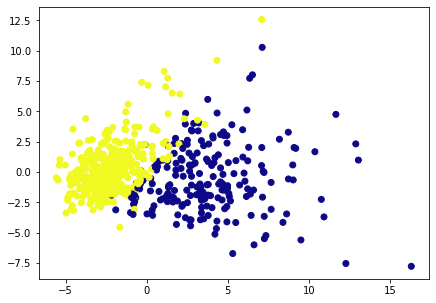

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(pca_data[: ,0],pca_data[: ,1],c=cancer['target'],cmap='plasma')

In [19]:
X= pca_data
Y= cancer['target']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state= 0)

In [21]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/Users/anshulsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred= logmodel.predict(X_test)

In [23]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [24]:
from sklearn.metrics import confusion_matrix
con_met= confusion_matrix(Y_test,y_pred)

In [25]:
con_met

array([[ 63,   5],
       [  7, 115]])

In [26]:
from sklearn.metrics import f1_score

In [27]:
metrix= f1_score(Y_test,y_pred)

In [28]:
metrix

0.950413223140496

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.96      0.94      0.95       122

    accuracy                           0.94       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.94      0.94      0.94       190



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


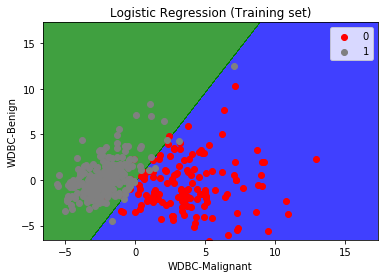

In [30]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
plt.contourf(X1, X2, logmodel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'grey'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('WDBC-Malignant')
plt.ylabel('WDBC-Benign')
plt.legend()
plt.show()




# Now let's just apply KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn= KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
y_pred_knn= knn.predict(X_test)
y_pred_knn

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [35]:
knn_matrix= confusion_matrix(Y_test,y_pred_knn)
knn_matrix

array([[ 57,  11],
       [ 13, 109]])

In [36]:
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        68
           1       0.91      0.89      0.90       122

    accuracy                           0.87       190
   macro avg       0.86      0.87      0.86       190
weighted avg       0.87      0.87      0.87       190



### Error is high because k value is just 1 which leads to under fitting. So to find best K value, we will use loop

In [37]:
from sklearn.model_selection import cross_val_score
accuracy_rate= []

for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn,scaled_df,cancer['target'],cv= 10)   # cross validation
    accuracy_rate.append(score.mean())

In [38]:
error_rate= []

for i in range(1,40):
    
    knn= KNeighborsClassifier(n_neighbors=i)
    score= cross_val_score(knn,scaled_df,cancer['target'],cv= 10)   # cross validation
    error_rate.append(1-score.mean())

### Plot the error rate

Text(0, 0.5, 'Error rate')

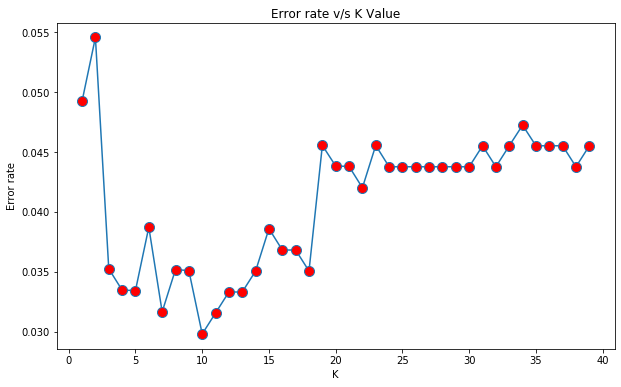

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, marker= 'o',markerfacecolor= 'red',markersize= 10)

plt.title('Error rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

Text(0, 0.5, 'Accuracy Rate')

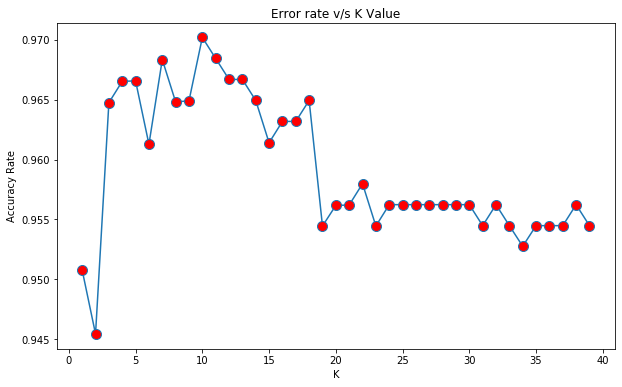

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate, marker= 'o',markerfacecolor= 'red',markersize= 10)

plt.title('Error rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

## We can easuily see from both the diagrams that after k> 34 the accuracy keeps on moving near to 95. But we may have a doubt with 19 also so we can use both 19 and 34 and verify our result

In [41]:
print('With k =1')
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
y_pred_knn= knn.predict(X_test)
knn_matrix= confusion_matrix(Y_test,y_pred_knn)
print('Matrix')
print(knn_matrix)

print('classification matirx is')
print(classification_report(Y_test,y_pred_knn))

With k =1
Matrix
[[ 57  11]
 [ 13 109]]
classification matirx is
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        68
           1       0.91      0.89      0.90       122

    accuracy                           0.87       190
   macro avg       0.86      0.87      0.86       190
weighted avg       0.87      0.87      0.87       190



In [50]:
print('°°°°°°°°°°°°°°  With k =19  °°°°°°°°°°°°')
knn= KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,Y_train)
y_pred_knn= knn.predict(X_test)
knn_matrix= confusion_matrix(Y_test,y_pred_knn)
print('Matrix')
print(knn_matrix)

print('classification matirx is')
print(classification_report(Y_test,y_pred_knn))

°°°°°°°°°°°°°°  With k =19  °°°°°°°°°°°°
Matrix
[[ 58  10]
 [  6 116]]
classification matirx is
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        68
           1       0.92      0.95      0.94       122

    accuracy                           0.92       190
   macro avg       0.91      0.90      0.91       190
weighted avg       0.92      0.92      0.92       190



In [51]:
print('°°°°°°°°°°°°°°  With k =34  °°°°°°°°°°°°')
knn= KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,Y_train)
y_pred_knn= knn.predict(X_test)
knn_matrix= confusion_matrix(Y_test,y_pred_knn)
print('Matrix')
print(knn_matrix)

print('classification matirx is')
print(classification_report(Y_test,y_pred_knn))

°°°°°°°°°°°°°°  With k =34  °°°°°°°°°°°°
Matrix
[[ 58  10]
 [  5 117]]
classification matirx is
              precision    recall  f1-score   support

           0       0.92      0.85      0.89        68
           1       0.92      0.96      0.94       122

    accuracy                           0.92       190
   macro avg       0.92      0.91      0.91       190
weighted avg       0.92      0.92      0.92       190



### weith k= 34 the recall value gets decreased by 1 so we can use this as our best value

In [52]:
print('°°°°°°°°°°°°°°  With Logestic Regression  °°°°°°°°°°°°')
print('Matrix')
print(con_met)
print('classifiction report is')
print(classification_report(Y_test,y_pred))

°°°°°°°°°°°°°°  With Logestic Regression  °°°°°°°°°°°°
Matrix
[[ 63   5]
 [  7 115]]
classifiction report is
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.96      0.94      0.95       122

    accuracy                           0.94       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.94      0.94      0.94       190

